### **Predictive model building - Students Dataset**

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.cluster import KMeans

student = pd.read_csv('Student_List_A2.csv')
student

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,1
1,1003,15,4.210570,26,2,0.112602,4
2,1004,17,10.028829,14,3,2.054218,3
3,1005,17,4.672495,17,3,1.288061,4
4,1006,18,8.191219,0,1,3.084184,1
...,...,...,...,...,...,...,...
2095,3386,16,1.445434,20,3,1.395631,1
2096,3388,18,10.680555,2,4,3.455509,0
2097,3390,16,6.805500,20,2,1.142333,2
2098,3391,16,12.416653,17,2,1.803297,1


In [50]:
#A1.2: Replacing values for ParentalEducation Column
pd.set_option('future.no_silent_downcasting', True)

# Replace values in the 'ParentalEducation' column
student['GradeClass'] = student['GradeClass'].replace({
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'F'
})

student

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B
...,...,...,...,...,...,...,...
2095,3386,16,1.445434,20,3,1.395631,B
2096,3388,18,10.680555,2,4,3.455509,A
2097,3390,16,6.805500,20,2,1.142333,C
2098,3391,16,12.416653,17,2,1.803297,B


In [51]:
#A1.3: Finding NaN values location

student[pd.isnull(student).any(axis=1)]

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
19,1021,16,NaN,2,3,2.778411,C
23,1025,18,NaN,15,2,1.505156,F
105,1107,16,NaN,18,0,0.842296,F
126,1128,15,NaN,10,1,2.819922,C
260,1262,16,NaN,20,1,1.265678,F
388,1390,15,NaN,16,3,1.848866,F
444,1446,17,NaN,29,4,0.869123,F
492,1494,16,NaN,25,1,0.567237,F
558,1560,16,NaN,5,3,3.366930,B
599,1601,15,NaN,7,1,2.446157,D


In [52]:
#A1.3: Replacing NaN values with average value from column
avg = student[['StudyTimeWeekly']].mean(skipna=True)
avg_value = avg['StudyTimeWeekly']

student['StudyTimeWeekly'] = student['StudyTimeWeekly'].fillna(avg_value)

In [53]:
#A1.4: Identifying data quality problem related to 'Absences' column

#Negative absences value must be deleted: -122
negative_values = student[student['Absences'] < 0]

#outlier value must be deleted: 320
threshold = student['Absences'].mean() + 3 * student['Absences'].std()
outliers = student[student['Absences'] > threshold]

student.drop(112,axis=0,inplace=True)
student.drop(1001,axis=0,inplace=True)

#The two quality problems related to the absences column were an outlier and a negative value for a non negative data.

**A1.5: GPA and GradeClass column investigation:**

Issue: Grade class assigned for some student's GPA is not correct (mismatch in GradeClass and GPA for student).
ie. 'A' grade for a student with GPA less than 3.5 which is incorrect.

**outliers = student[(student['GradeClass'] == 'B') & (student['GPA'] < 3.0)]**

Solution: use .loc method to find and replace all the grades correctly based on the GPA range provided, 
ensuring consistency and making sure that there are no errors or mismatch after replacement.

In [55]:

student.loc[student['GPA'] >= 3.5, 'GradeClass'] = 'A'
student.loc[(student['GPA'] >= 3.0) & (student['GPA'] < 3.5), 'GradeClass'] = 'B'
student.loc[(student['GPA'] >= 2.5) & (student['GPA'] < 3.0), 'GradeClass'] = 'C'
student.loc[(student['GPA'] >= 2.0) & (student['GPA'] < 2.5), 'GradeClass'] = 'D'
student.loc[student['GPA'] < 2.0, 'GradeClass'] = 'F'

student

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B
...,...,...,...,...,...,...,...
2095,3386,16,1.445434,20,3,1.395631,F
2096,3388,18,10.680555,2,4,3.455509,B
2097,3390,16,6.805500,20,2,1.142333,F
2098,3391,16,12.416653,17,2,1.803297,F


**A2: Supervised learning**

A2.1: Explain supevised machine learning, the notion of labelled data, and train and test datasets

-**Supervised machine learning:** Machine learning is the study of algorithms and statistical models that enable computer systems to perform tasks without explicit instructions, relying on patterns and inference. Supervised machine learning involves labelled data, and the goal is to predict the output from input features. Thus, allowing predictions on unseen data to be made in the future.

-**Notion of labelled data**: Labeled data refers to a dataset where each example, also considered as a data point, comes with a corresponding 'label', or a correct output for that example. These labels help guide the learning process as well as allows the models to learn the underlying patterns between the input and output.
In supervised learnning, the algorithm uses these labels to understand how the input features relate to the output

-**Train and test datasets**: The data used in supervised learning is split into two sets:

- **Training dataset:** This dataset contains majority of the data, ranging around 70-80% of the entire dataset. It is used to train the model, allowing it to learn the patterns and relationships between input features and their corresponding labels.
- The model can continously update its parameters based on this training data to minimize error in predictions.

- **Test dataset:** The remaining 20-30% of the dataset is used as the test dataset. The test dataset is not seen or used by the model for training and serves as an evaluation tool to asses how well the model performs on new data.
- Since the labels in the test dataset are known, we can compare the predicted output to the actual labels to compute a classification report consisting of metrics such as accuracy, precision and so on.

In [57]:
#A2.2 Using wrangled data from A1 and separate the features and the label.

label_columns = ['StudentID', 'GradeClass', 'GPA']

#separating the labels
y = student['GradeClass']

#separating the features
X = student.drop(label_columns, axis=1)

#training the dataset
X_train, X_test, y_train, y_test = train_test_split(
  X,y, random_state=34,test_size=0.20, shuffle=True)

**A3: Classification (training):**
</n>

A3.1: In preparation for classification, your data should be normalised/scaled.
</n>

**a. Describe what you understand from this need to normalise data (this is in
your Week 7 applied session).**

Ans: Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without feature scaling **(a.k.a. normalization)**. 

For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed **(heavily influenced)** by this particular feature. Therefore, the range of all features should be normalized in order for each feature to contribute proportionately to the final distance.

In [59]:
#b. Choose and use the appropriate normalisation functions available in
#sklearn.preprocessing and scale the data appropriately.

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**A3.2 Support Vector Machine algorithm to build the model.**

a. Describe SVM:

Ans: Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression, and outlier detection tasks. 

SVMs can be used for a variety of tasks, such as text classification, image classification and so on.
SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data and non-linear relationships. They can also be applied to regression problems (SVR, Support vector regression). 

**Some key concepts of SVM include:**

- **The hyperplane:** Its a boundary that separates the classes. The goal of the SVM is to maximize the margin between the hyperplane and the nearest data points from each class, known as margin maximization. The idea is to find the boundary that not only separates the classes but does so with the largest possible margin, making the model more generalizable to new data.

- **Linear and non-linear SVM's:**

- Linear SVM: If the data can be separated by a straight line or a linear boundary, the SVM algorithm uses a linear hyperplane. This is known as a linearly separable problem.
- Non-Linear SVM: In some cases, the data may not be linearly separable. To handle this, SVMs can use a technique called the kernel trick, which projects the data into a higher-dimensional space where a linear separation is possible. This allows the SVM to create non-linear decision boundaries in the original input space.
The key idea behind SVM is to find the optimal boundary that best separates data points of different classes.

**Reference: https://www.geeksforgeeks.org/support-vector-machine-algorithm/**

b. Explain what kernal is in SVM:

Ans: A kernal can be considered like a transformer. It's a mathematical function that converts data into a higher dimensional space, allowing the SVM to find a more effective hyperplane to separate data.

When data points are not linearly separable in their original feature space, SVM needs a way to differentiate between the points and this is where the kernal comes into play. It allows mapping data to a higher dimension where classes become separable.

It is highly useful in real world situations where data is not linearly separable, also allowing SVM to handle non linear relationships much more easily and efficiently.

Some examples of kernals used in SVM are: linear, rbf, poly, etc.

The more commonly used one being the linear kernal.

In [105]:
#c. building a SVM predictive model using training dataset from before

svm_model = SVC(kernel='linear', C=0.5, class_weight={ 'A': 1.5, 'B': 1, 'C': 1, 'D': 1, 'F': 1 })
svm_model.fit(X_train_scaled, y_train)

SVC(C=0.5, class_weight={'A': 1.5, 'B': 1, 'C': 1, 'D': 1, 'F': 1},
    kernel='linear')

**Explanation on why class weight for grade 'A' is given higher priority:**

- In some rare cases, while the model is being used to predict the data, there can be circumstances where minority data is not taken into account leading for the model to be less accurate and result in data imbalance.

- Adjusting the weights to a certain extent allows for a more natural distribution of classes while giving more importance to the underrepresented classes as well, leading to a better model performance and more sensitity to the minority classes without overfitting heavily to them.

- After testing around with different values, these class weights seem to give the best accuracy (so far) for the model which allows for a good prediction to be made.

In [98]:
#A3.3: Repeating task A3.3 using random forest algorithm

classifier = RandomForestClassifier(
 n_estimators = 70,
 criterion = 'gini',
  max_depth = 10,
 random_state = 40
)

classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=70, random_state=40)

In [100]:
#A4.1: Using the testing dataset you created in Task A2.3 above, conduct the
#prediction for the ‘GradeClass’ (label)

#SVM:
print("==========SVM MODEL==========")
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("")

#A4.2: Displaying confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("")

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("")

#random forest:
print("==========Random Forest==========")
# Predicting the Test set result
y_pred = classifier.predict(X_test)

#A4.2: Displaying confusion Matrix
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("")

print("Confusion Matrix:")
print(cm)

print("")

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

==========SVM MODEL==========
Accuracy: 0.79

Confusion Matrix:
[[  3  10   0   0   0]
 [  2  23  19   1   0]
 [  0   4  49  12   1]
 [  0   0  17  40  14]
 [  0   0   0   8 217]]

Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.23      0.33        13
           B       0.62      0.51      0.56        45
           C       0.58      0.74      0.65        66
           D       0.66      0.56      0.61        71
           F       0.94      0.96      0.95       225

    accuracy                           0.79       420
   macro avg       0.68      0.60      0.62       420
weighted avg       0.79      0.79      0.78       420


==========Random Forest==========
Accuracy: 0.78

Confusion Matrix:
[[  6   6   1   0   0]
 [  4  23  17   1   0]
 [  0   9  42  13   2]
 [  0   1  14  42  14]
 [  0   0   0  10 215]]

Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.46      0.52

### **A4.3: Comparing performance of SVM and Random forest algorithm**:

- Based on the results present above, the SVM model performed approximately 1% better on the accuracy test compared to the random forest model.

- SVM is better at handling imbalanced datasets. It focuses on boundary cases and doesn't need many samples to maintain performance on the minority class. In this case, classes like A and B are quite small in terms of support.
- In addition, SVM tends to be less prone to overfitting, especially if the appropriate kernal function is chosen (in this case 'linear'). Since SVM focuses on the challenging data points, it avoids fitting to noise or less relevant data points. On the other hand, random forest, although generally robust due to its nature, can still overfit slightly, especially when the depth of trees is not well-tuned or when individual trees are too deep

- SVM also provides a clean decision boundary, which in some cases results in a more interpretable model, especially when compared to Random Forest, which involves averaging decisions across hundreds or thousands of trees. A more straightforward decision boundary might explain why SVM has a slight advantage in accuracy, as it is more focused on finding the "optimal" solution.

- SVM performs slightly better in terms of overall accuracy and shows strength with higher recall for class C.
Random Forest performs better on the less frequent classes (A and B), and its macro-average F1-score (0.65) is higher than SVM's (0.63), indicating it is better at handling all classes more equally, especially the minority ones.

- Justification: If the application requires a model that performs well across all classes, including minority classes (A and B), Random Forest would be the better choice.
- However, if slightly better accuracy and recall on specific classes (like class C) are important, SVM would be preferred. The decision depends on the priorities in terms of class performance.

- Overall, SVM is much easier to fine-tune to increase accuracy for this dataset, allowing it to handle the data's complexity and class imbalance better, giving it a slight edge over random forest.

In [110]:
#A5.1: Read the Student_List_A2_Submission.csv file and use the best model you
#built earlier to predict the ‘GradeClass for the students in this file

student_data = pd.read_csv('Student_List_A2_Submission.csv')

# Separate StudentID for output
student_ID = student_data['StudentID']

# Drop the StudentID from the features
student2 = student_data.drop(columns=['StudentID'])

# Make sure to scale using the same scaler used for training
# Use the previously fitted StandardScaler instance if available
sc = StandardScaler()

# Scale the features in the same way as during training
# Fit and transform should only be done on the training set, so we only use transform here
student2_scaled = sc.fit_transform(student2)  # You might want to save the scaler when training to reuse

# Now, use the trained SVM model to predict
predicted_grades = svm_model.predict(student2_scaled)

# Create a DataFrame with the results
results = pd.DataFrame({
    'StudentID': student_ID, 
    'GradeClass': predicted_grades
})

# Optionally, group results by GradeClass to see count
results.groupby('GradeClass').agg('count')

results.to_csv('Predicted_Grades.csv', index=False)

**Task B: Selection of Dataset, Clustering and Video Preparation**:

**B1. https://www.kaggle.com/datasets/satyajeetrai/palmer-penguins-dataset-for-eda**

In [68]:
peng = pd.read_csv('penguins.csv')
peng

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [69]:
#B1.2: cleaning dataset
peng = pd.read_csv('penguins.csv')

#carrying out data cleaning + optimizations

peng[pd.isnull(peng).any(axis=1)]

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [70]:
peng.drop(peng[peng['sex'].isna()].index, inplace = True)

#resetting index to adjust to new player count
peng = peng.reset_index()

#removing extra index column
peng.drop('index', axis=1, inplace=True)
peng

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
328,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


**Treating missing data:**

Rows of missing data, specifically in the 'sex' column where the gender wasn't mentioned for some of the penguins were removed in
order to provide more accurate results for predictions done on the dataset as well as improve data accuracy and consistency.

There are other columns as well as seen in the dataset when the .isnull method is used where there is no data present (bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g columns), however as removing the null values based on the 'sex' column results in the removal of null values also present in those rows, a separate line of code doesn't need to be written in order to remove null values from the mentioned columns as well.

In [72]:
#B1.3: k means clustering

kmeans = KMeans(n_clusters=2).fit(
 peng[['bill_length_mm','flipper_length_mm']]
)

kmeans

KMeans(n_clusters=2)

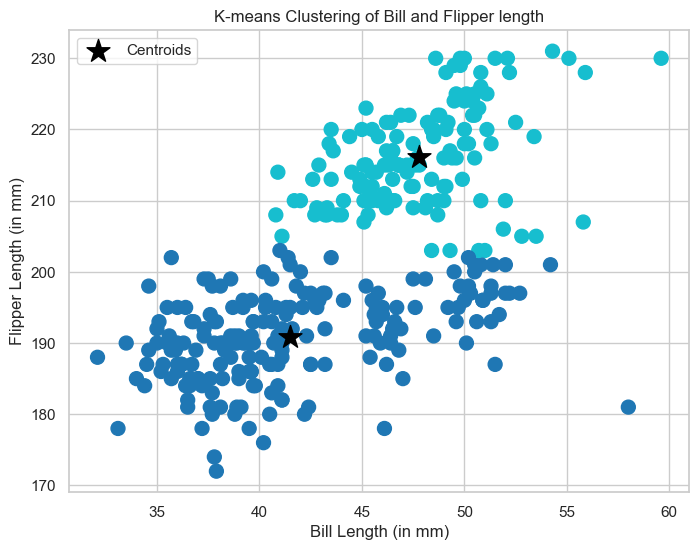

In [73]:
#setting style for graph
sns.set(style="whitegrid")

# Create a scatter plot with seaborn-like aesthetics
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    x=peng['bill_length_mm'], 
    y=peng['flipper_length_mm'],
    c=kmeans.labels_, 
    cmap='tab10', 
    s=100,   # Increase marker size
)

# Plot the cluster centers with larger star markers
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    color='black', 
    marker='*', 
    s=300, 
    label='Centroids'
)

# Add labels, title, and legend
plt.xlabel('Bill Length (in mm)')
plt.ylabel('Flipper Length (in mm)')
plt.title('K-means Clustering of Bill and Flipper length')

# Show plot with legend for centroids
plt.legend()

plt.show()

**Explanation:**

- Firstly, the graph represents the relationship between two distinct clusters (bill length and filpper length), marked by different colors. The black stars known as centroids mark the center or average points for each of these clusters.

- The dark blue cluster group has shorter bill lengths, ranging from approximately 34mm to 50mm. The flipper lengths in this category are also on the lower end ranging between 170mm to around 205mm.

- The light blue cluster group contains penguins with longer bill lengths, roughly from 46mm to 60mm. The flipper lengths are also longer, typically ranging from 200mm to 230mm.

- The centroids represent the average characteristics of each cluster. 
The centroid for the dark blue cluster is positioned to reflect penguins with shorter bills and shorter flippers, while the centroid of the light blue cluster reflects pengins with longer bills and flippers.

- There is an outlier from both the light and dark blue clusters, which means they don't fit nearly into either cluster. This can suggest some unusual measurements or measurement errors.

- From the cluster, it seems that longer bill length generally contributes to longer flipper lengths, hinting at some sort of biological relationship between these two parts of the penguins.